<div class="alert alert-block alert-info">
    
# Step 1: Problem Introduction & Motivation

</div>

<div class ="alert alert-block alert-success">

# Customer Churn Prediction

<!-- Placeholder: Describe the context, business motivation, and objective of the analysis -->


</div>

<div class ="alert alert-block alert-success">

### Introduction & Motivation
Customer churn, or the loss of customers, is critical to business sustainability, especially in subscription-based services. 

As a former Customer Success Manager in an EdTech startup, I understand firsthand the business value of proactively identifying customers who may churn. Early intervention can increase retention, minimize revenue loss, and improve customer satisfaction. Thus, building a predictive model to identify customers likely to churn is highly valuable.

</div>

<div class="alert alert-block alert-info">

# Step 2: Data Loading & Initial Exploration

<!-- Placeholder: Add dataset source, sample view, basic info, and variable overview -->

In this step, we:
- Load the dataset into a DataFrame
- Explore data structure and summary statistics
- Understand variable types and check for obvious issues
  
</div>

In [3]:
import pandas as pd

RuntimeError: CPU dispatcher tracer already initlized

In [ ]:
ls                     #I do this step to check the file directory and find the dataset I am going to work with.


manohar_akanksha_p1.ipynb  telco_customer_churn.csv
requirements.txt           venv/


In [ ]:
# Load data
df = pd.read_csv('telco_customer_churn.csv')

In [ ]:
df.head()

,churn,senior_citizen,has_dependents,months_as_cutomer,has_internet_service,has_month_to_month_contract
0,0,0,0,1,1,1
1,0,0,0,34,1,0
2,1,0,0,2,1,1
3,0,0,0,45,1,0
4,1,0,0,2,1,1


In [ ]:
# Initial exploration

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   churn                        7043 non-null   int64
 1   senior_citizen               7043 non-null   int64
 2   has_dependents               7043 non-null   int64
 3   months_as_cutomer            7043 non-null   int64
 4   has_internet_service         7043 non-null   int64
 5   has_month_to_month_contract  7043 non-null   int64
dtypes: int64(6)
memory usage: 330.3 KB


In [ ]:
df.describe()

,churn,senior_citizen,has_dependents,months_as_cutomer,has_internet_service,has_month_to_month_contract
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.299588,32.371149,0.783331,0.550192
std,0.441561,0.368612,0.458110,24.559481,0.412004,0.497510
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000
75%,1.000000,0.000000,1.000000,55.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000


In [ ]:
# Check which columns are numerical vs. categorical
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['churn', 'senior_citizen', 'has_dependents', 'months_as_cutomer', 'has_internet_service', 'has_month_to_month_contract']
Categorical Columns: []



### Dataset Description:

- **Target Variable**:
  - `churn`: Binary variable (1 if churned, 0 if retained)

- **Predictor Variables**:

  
  - `senior_citizen`: categorical (binary)
  - `has_dependents`: categorical (binary)
  - `months_as_cutomer`: numeric (continuous)
  - `has_internet_service`: categorical (binary)
  - `has_month_to_month_contract`: categorical (binary)


<div class="alert alert-block alert-info">

# Step 3: Data Preparation & Cleaning

<!-- Documentation: We checked for missing values and validated data types. Since all variables were binary or numeric, no encoding or scaling was required. If we had text or non-numeric values, we could use one-hot encoding or label encoding. -->


<!-- Placeholder: Insert additional data cleaning tasks or decisions if needed -->


### Data Preparation Tasks:
- **Check and handle missing values** - To ensure our model is accurate, we must handle or remove missing data
- **Validate data types** - Ensuring each variable is correctly identified as numeric or categorical.
- **Encode categorical variables** - Transform categorical variables into numeric form, which is necessary for the model to interpret them.
- **Perform any necessary scaling or normalization** - Adjusting numeric variables to a similar scale to help the model perform better.

In our specific dataset:
- We **did not convert categorical variables** because all provided features were already binary numeric variables.
- We **did not apply transformations or standardization** since Decision Trees do not require scaling.

</div>

In [ ]:
# Check for missing values
df.isnull().sum()

churn                          0
senior_citizen                 0
has_dependents                 0
months_as_cutomer              0
has_internet_service           0
has_month_to_month_contract    0
dtype: int64

<div class="alert alert-block alert-info">

- **Since all variables are already numeric or binary, no encoding required.**
- **If scaling is required (e.g., normalization), include the step here.**
</div>

In [ ]:
# Save processed dataset
df.to_csv('processed_customer_churn.csv', index=False)

In [ ]:
df = pd.read_csv('processed_customer_churn.csv')

In [ ]:
df.head()

,churn,senior_citizen,has_dependents,months_as_cutomer,has_internet_service,has_month_to_month_contract
0,0,0,0,1,1,1
1,0,0,0,34,1,0
2,1,0,0,2,1,1
3,0,0,0,45,1,0
4,1,0,0,2,1,1


<div class="alert alert-block alert-info">

# Step 4: Data Partitioning

<!-- Documentation: We used stratified splitting to preserve class distribution between training and validation sets. Other options include k-fold cross-validation (for robust performance estimation) or time-based splitting (in temporal datasets). -->


<!-- Placeholder: Insert notes on alternative partitioning strategies or additional test sets -->


### Partitioning Strategy:

We partition our dataset into two subsets:

- **Training Set (70%)**: The model learns patterns from this data.
- **Validation Set (30%)**: The model's performance is tested against unseen data to ensure generalizability.
- We use stratified splitting to maintain the proportion of our target classes.
</div>

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('churn', axis=1)
y = df['churn']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print(f'Training set size: {X_train.shape}')
print(f'Validation set size: {X_val.shape}')

Training set size: (4930, 5)
Validation set size: (2113, 5)


<div class="alert alert-block alert-info">

# Step 5: Modeling

<!-- Documentation: Decision Tree classifiers are ideal for interpretability and rule-based decisions. Other options include logistic regression (for linear relationships), random forest (for more robustness), and gradient boosting (for better accuracy with complex data). We chose Decision Tree for its visual transparency and simplicity in educational contexts. -->


<!-- Placeholder: Insert exploration of other models (e.g., logistic regression) or tuning techniques -->

### Decision Tree Classifier:
- Fit Decision Tree model
- Perform feature selection if necessary


We use a **Decision Tree Classifier**, chosen for its interpretability and effectiveness in classification problems.
- We explicitly choose the **Entropy** criterion to measure information gain and capture subtle differences between classes.
- We could have also used **Gini**, which is computationally faster and often gives similar results.
- Entropy was selected here for its educational value in demonstrating how splits reduce information uncertainty.
- We set `max_depth=4` to prevent overfitting, improve generalization, and ensure clearer visualization.
- Fit the Decision Tree model on the training set.
- Make predictions on both training and validation sets to assess performance.
- **Visualize the tree after training to inspect its structure.**, chosen for its interpretability and effectiveness in classification problems.


</div>

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Instantiate and train model using entropy criterion and max_depth
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


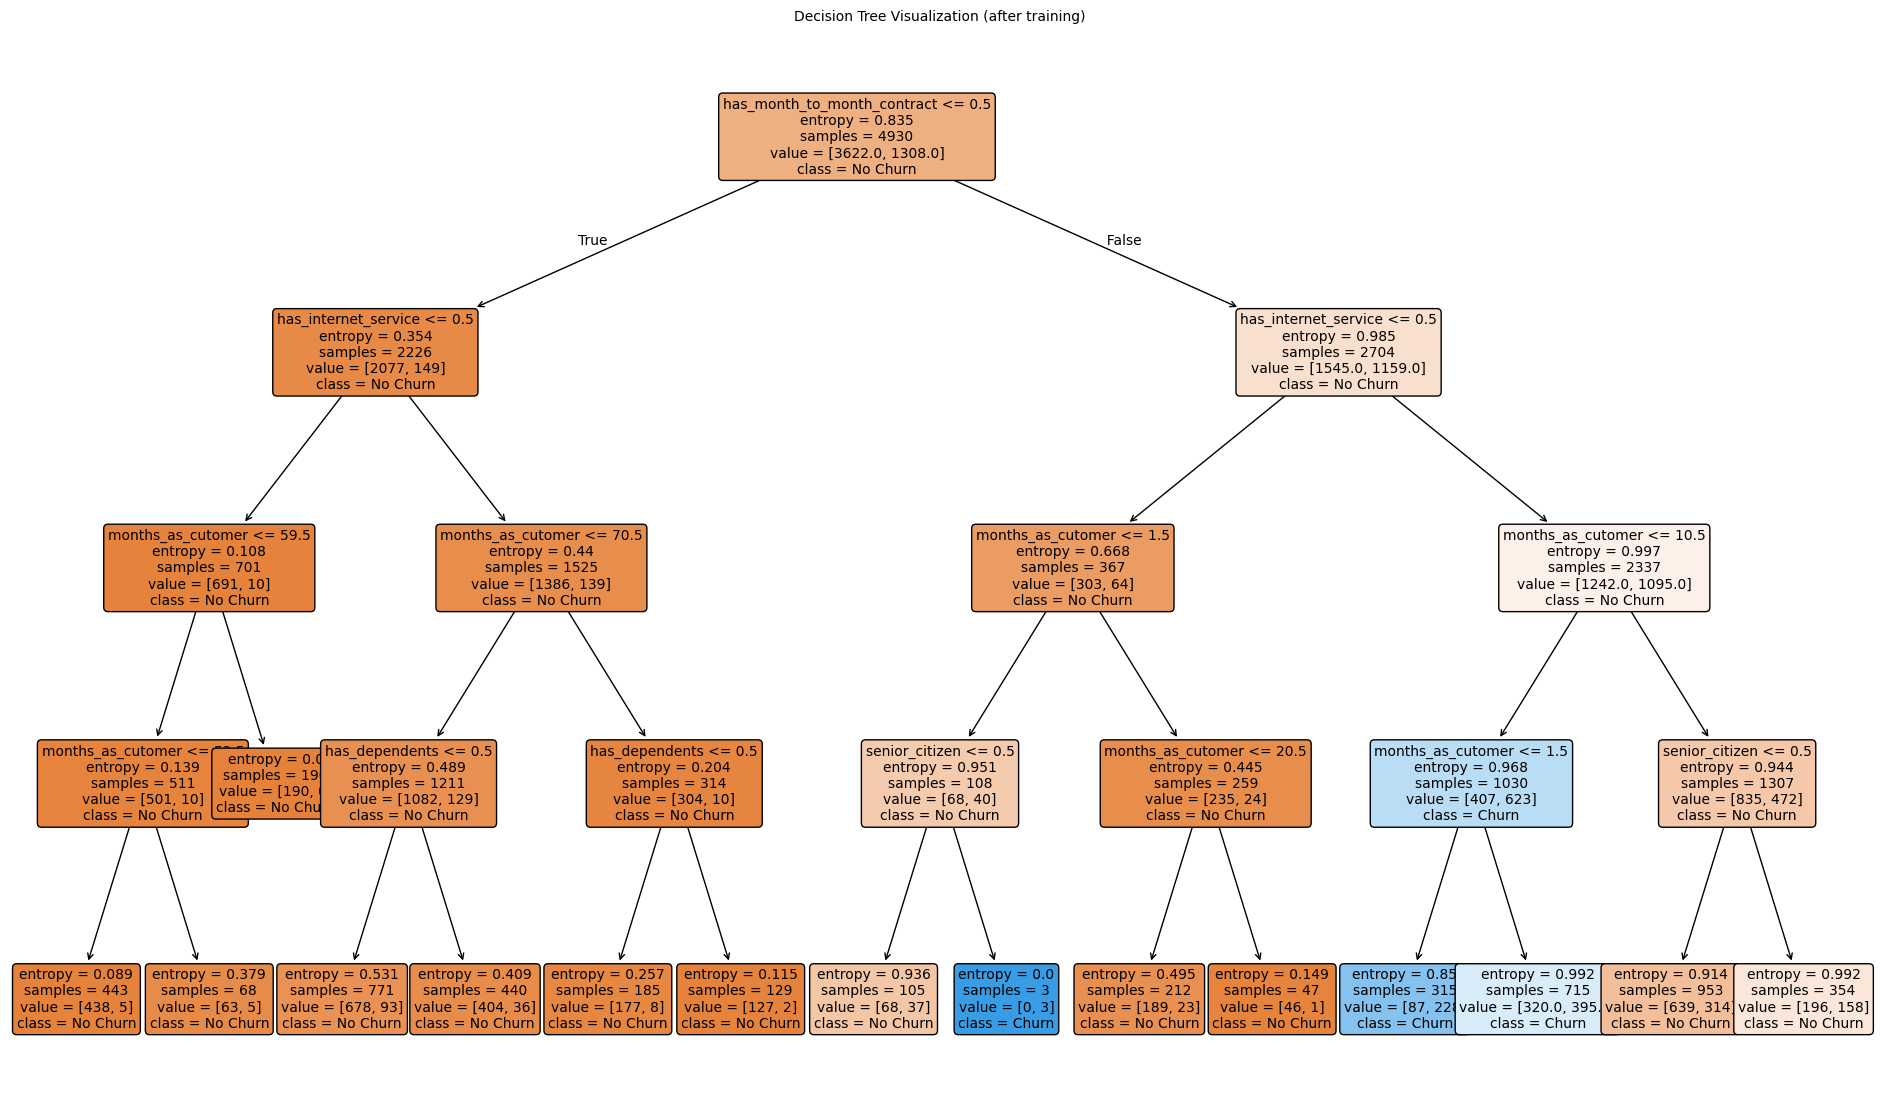

In [ ]:
# Visualization after training
plt.figure(figsize=(24, 14))
plt.rcParams.update({'font.size': 10})
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['No Churn', 'Churn'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title('Decision Tree Visualization (after training)', fontsize=10)
plt.show()

In [ ]:
# Predictions
y_pred_train = dt_model.predict(X_train)
y_pred_val = dt_model.predict(X_val)

In [ ]:
# Evaluate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
val_accuracy = accuracy_score(y_val, y_pred_val)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Validation Accuracy: {val_accuracy:.2f}')

Training Accuracy: 0.78
Validation Accuracy: 0.77


<div class ="alert alert-block alert-success">

### Model Performance Summary

✅ **Training Accuracy (78%)**: The model correctly predicted 78% of the outcomes in the data it learned from.  
✅ **Validation Accuracy (77%)**: The model correctly predicted 77% of the outcomes on unseen data.

The training and validation scores are very close, which means:  
- Your model is **not overfitting** (i.e., memorizing training data).  
- It likely **generalizes well** to new data.

A validation accuracy of 77% in a churn prediction problem is a strong baseline—especially if your dataset is balanced.

*“Our model achieved 78% accuracy on training data and 77% on validation, showing strong generalization and minimal overfitting. This indicates that the Decision Tree was well-tuned for the current problem, and serves as a solid foundation for future tuning or model comparisons.”*
</div>

<div class="alert alert-block alert-info">

# Step 6: Model Evaluation and Visualization

<!-- Placeholder: Insert additional evaluation metrics or business interpretation of results -->

### Evaluate the Decision Tree using:

- **Accuracy, Precision, Recall, and F1-score**: Provides a comprehensive view of model performance.
- **Visualization**: Offers an intuitive understanding of how the Decision Tree makes predictions.
</div>

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Classification report
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1552
           1       0.58      0.45      0.51       561

    accuracy                           0.77      2113
   macro avg       0.70      0.67      0.68      2113
weighted avg       0.76      0.77      0.76      2113



<div class ="alert alert-block alert-success">

### Classification Report Summary

The classification report breaks down the model's performance across each class:

- **Class 0 (No Churn)**: Precision = 0.82, Recall = 0.88, F1-score = 0.85
  - This means the model is doing a very good job identifying customers who are not going to churn.

- **Class 1 (Churn)**: Precision = 0.58, Recall = 0.45, F1-score = 0.51
  - The model is less effective at identifying customers who will churn — it catches fewer actual churners (lower recall) and makes more false positives (lower precision).

- **Overall Accuracy = 77%**: The model correctly predicts churn/no churn 77% of the time.
- **Macro Avg** (equal weight to both classes): Shows some imbalance in performance.
- **Weighted Avg** (accounts for class imbalance): Aligns closely with overall accuracy.

💡 **Interpretation**: While the model performs well on the majority class (non-churners), its performance on the minority class (churners) needs improvement. Future improvements may include balancing techniques (e.g., SMOTE), trying ensemble models, or adjusting the decision threshold.

</div>

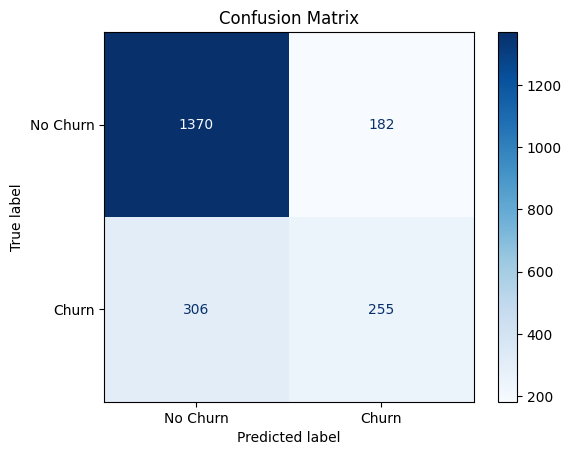

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_val)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn']).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

<div class ="alert alert-block alert-success">

### Confusion Matrix Summary

- **True Positives (TP)**: 255 customers who actually churned and were correctly predicted to churn.
- **True Negatives (TN)**: 1370 customers who did not churn and were correctly predicted to stay.
- **False Positives (FP)**: 182 customers predicted to churn but actually stayed (Type I error).
- **False Negatives (FN)**: 306 customers who churned but were not identified by the model (Type II error).

The model is good at predicting non-churners (**high true negatives**).
It struggles with identifying churners — **306 out of 561 churners were missed**.

This supports the **low recall for the churn class** seen in the classification report.
</div>

In [ ]:
# Feature Importance

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importance)


Feature Importance:
                       Feature  Importance
4  has_month_to_month_contract    0.669948
2            months_as_cutomer    0.177622
3         has_internet_service    0.132137
0               senior_citizen    0.015425
1               has_dependents    0.004868


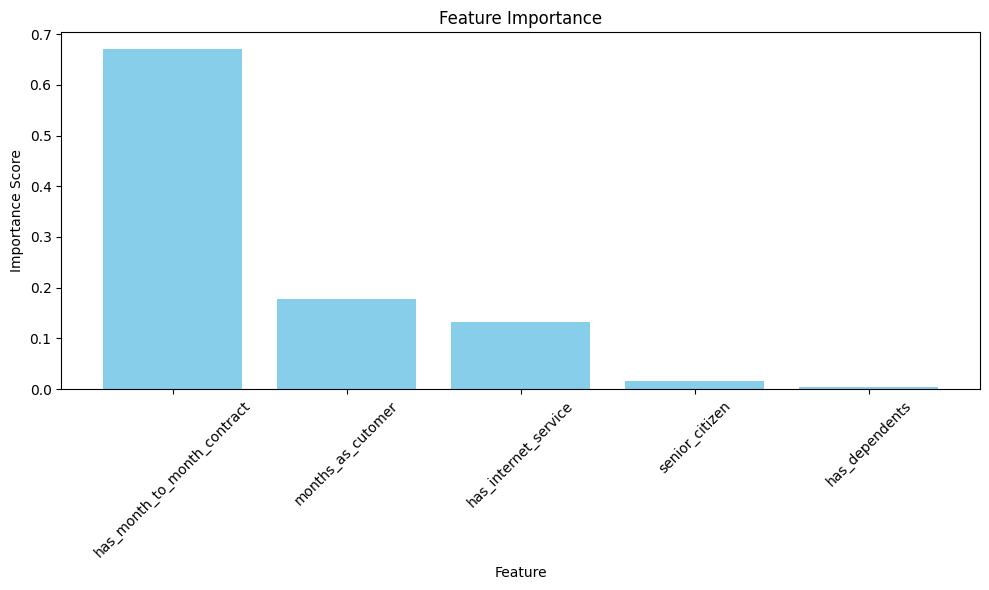

In [ ]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.bar(importance['Feature'], importance['Importance'], color='skyblue')
plt.title('Feature Importance')
plt.ylabel('Importance Score')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div class ="alert alert-block alert-success">

### Feature Importance Summary

- The most influential feature is **has_month_to_month_contract** (0.67), meaning customers with month-to-month contracts are more likely to churn — consistent with industry understanding.
- **months_as_cutomer** (0.18) also contributes significantly, indicating that tenure affects churn likelihood.
- **has_internet_service** (0.13) plays a moderate role.
- **senior_citizen** (0.015) and **has_dependents** (0.005) have minimal impact on the model's decisions.

💡 **Conclusion:**
The model heavily relies on contract type and customer tenure to predict churn. Business teams should prioritize these factors in retention strategies and customer outreach.
</div>

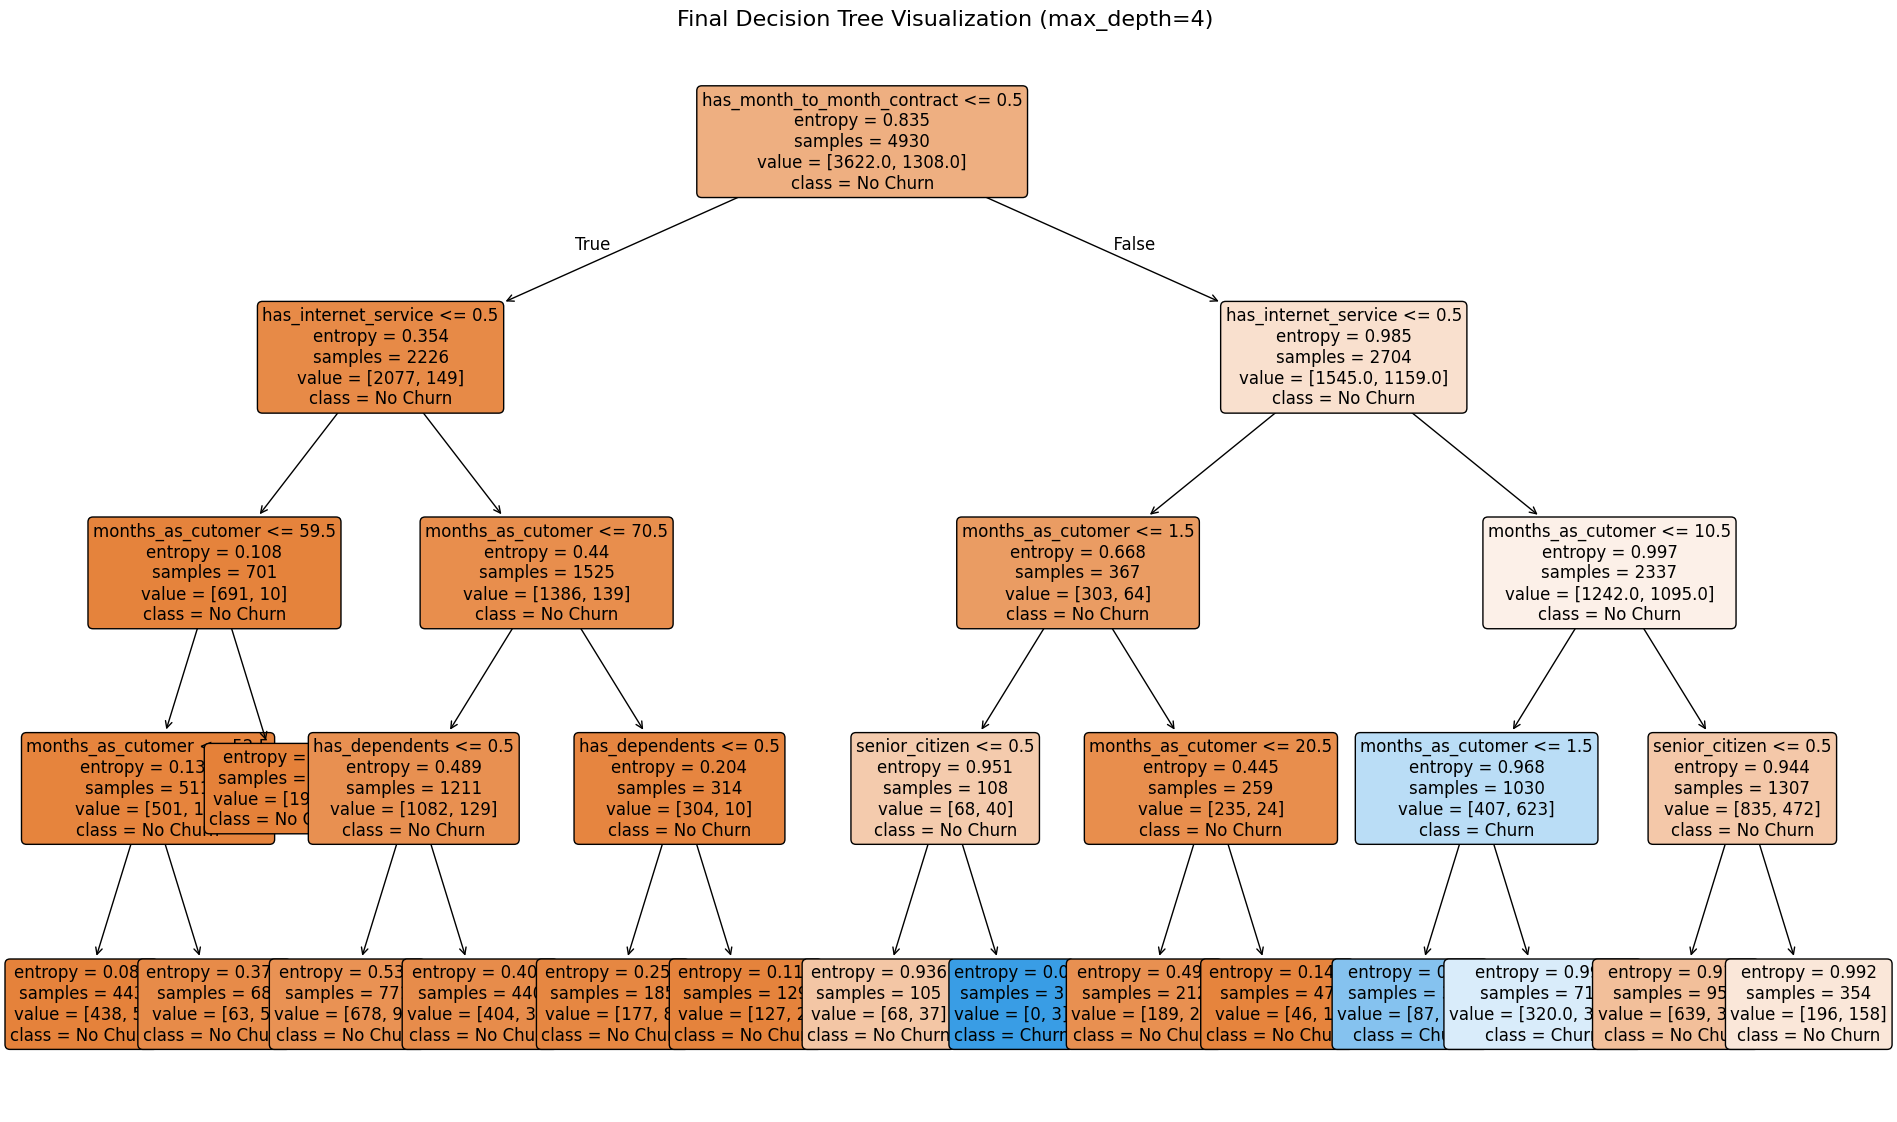

In [ ]:
# Visualize the Decision Tree - Final
plt.figure(figsize=(24, 14))
plt.rcParams.update({'font.size': 12})
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['No Churn', 'Churn'],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title('Final Decision Tree Visualization (max_depth=4)', fontsize=16)
plt.show()

<div class ="alert alert-block alert-success">

### Decision Tree Visualization Insights

- The root node shows that **contract type (month-to-month)** is the most important first split. Customers with month-to-month contracts are more likely to churn — this aligns with our feature importance scores.
- The second most important factor is **internet service** — customers without it tend to stay longer.
- The tree also uses **months_as_customer** frequently, showing that tenure impacts churn likelihood.
- Leaf nodes show many segments that are confidently predicted (low entropy), especially for non-churners.

 **Conclusion:**
The Decision Tree makes intuitive business sense:
- Customers on short-term contracts and with short tenure are most at risk.
- This visualization supports targeted retention strategies focused on new or month-to-month customers.
- The clear structure makes it easy for non-technical stakeholders to interpret the logic behind churn prediction.
</div>

<div class="alert alert-block alert-info">

### Next Steps for Improvement:

- **Hyperparameter Tuning (e.g., GridSearchCV)**  
  Helps find the best values for parameters like `max_depth`, `min_samples_split`, etc., improving performance and reducing overfitting.

- **Cross-validation**  
  Ensures the model performs consistently across different data splits, making evaluation more robust and reliable.

- **Feature Importance Analysis**  
  Provides insights into which variables most influence churn prediction, guiding both business strategy and potential dimensionality reduction.

- **Model Comparison**  
  Try other classification models like Logistic Regression, Random Forest, or Gradient Boosting to see if better performance or interpretability can be achieved.

- **Deploying the Model**  
  Integrate the final model into business systems to monitor and intervene with high-risk customers in real-time.

</div>